In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import src.utils as utils
import scipy
import seaborn as sns
from scipy.signal import detrend
import statsmodels.api as sm
import statsmodels.formula.api as smf



In [2]:
# Import DataFrames
observatoire = utils.get_observatoire(True)

We would like to look at the evolution of many variables over the course of time. We first take a look at temperature.

In [3]:
def months(data_frame):
    return data_frame.DATE.apply(lambda n: str(n)[4:6])

def years(data_frame):
    return data_frame.DATE.apply(lambda n: str(n)[0:4])

observatoire["months"] = months(observatoire)
observatoire["years"] = years(observatoire)
observatoire.groupby([observatoire.months, observatoire.years]).head()

regrouped = observatoire.groupby(['months','years'], as_index=False)['TG'].mean()

# for year in regrouped.years.unique():
    # by_month = regrouped[regrouped.years == year].groupby('months')['TG'].mean()
    # sns.relplot(x=by_month.index, y=by_month, kind="line")

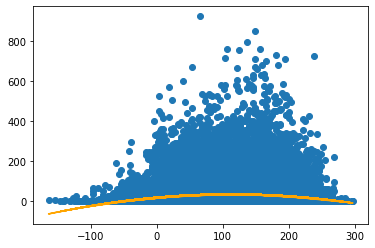

In [4]:
cointrin = utils.get_cointrin()
lm1 = smf.ols('RR ~ TG + np.power(TG, 2) ', data=cointrin).fit()
plt.scatter(cointrin.TG[lm1.fittedvalues.index], cointrin.RR[lm1.fittedvalues.index])
plt.plot(cointrin.TG[lm1.fittedvalues.index], lm1.fittedvalues, color = "orange")
# print(lm1.summary())
# fig, axes = plt.subplots(figsize=(70,12))

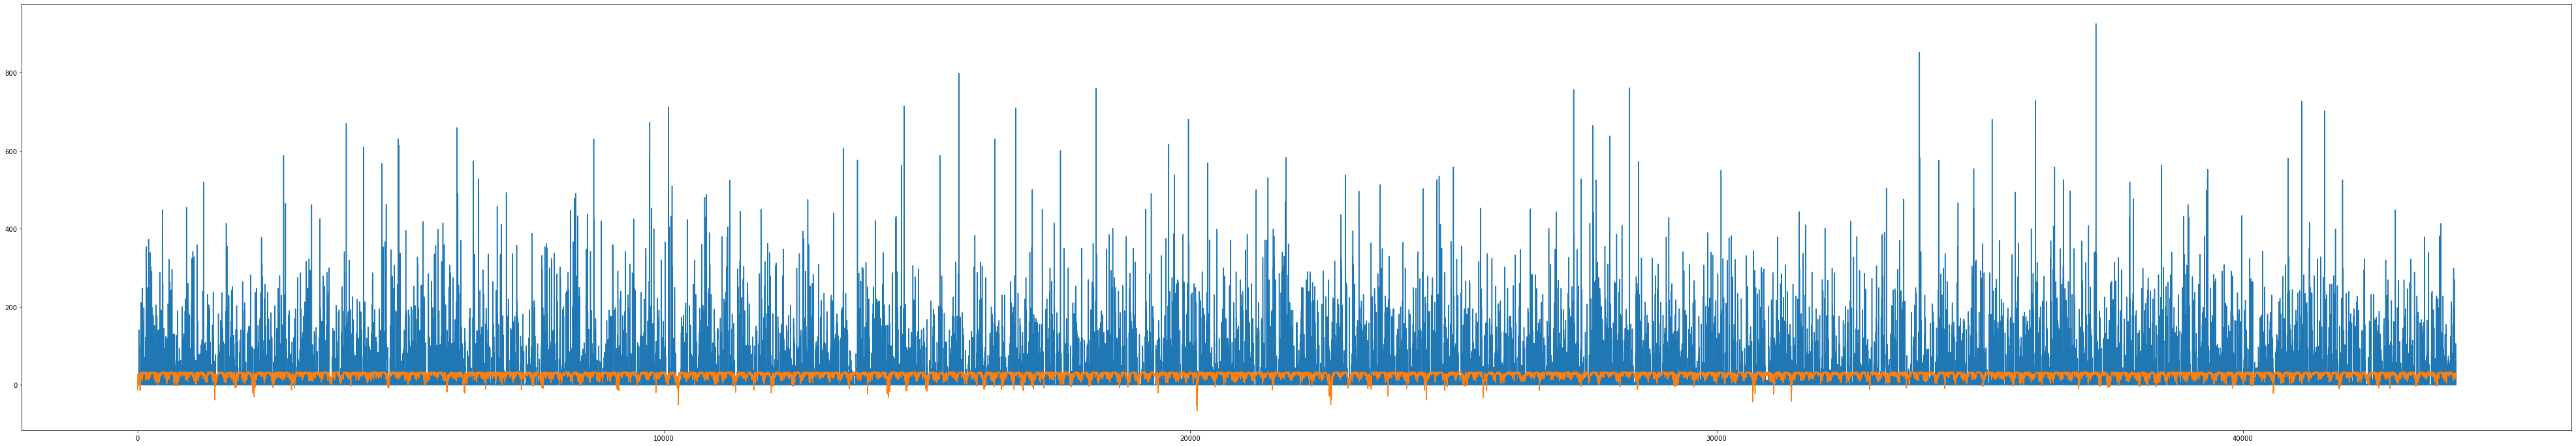

In [5]:

fig, axes = plt.subplots(figsize=(70,12))
plt.plot(lm1.fittedvalues.index, cointrin.RR[lm1.fittedvalues.index])
plt.plot(lm1.fittedvalues.index, lm1.fittedvalues)

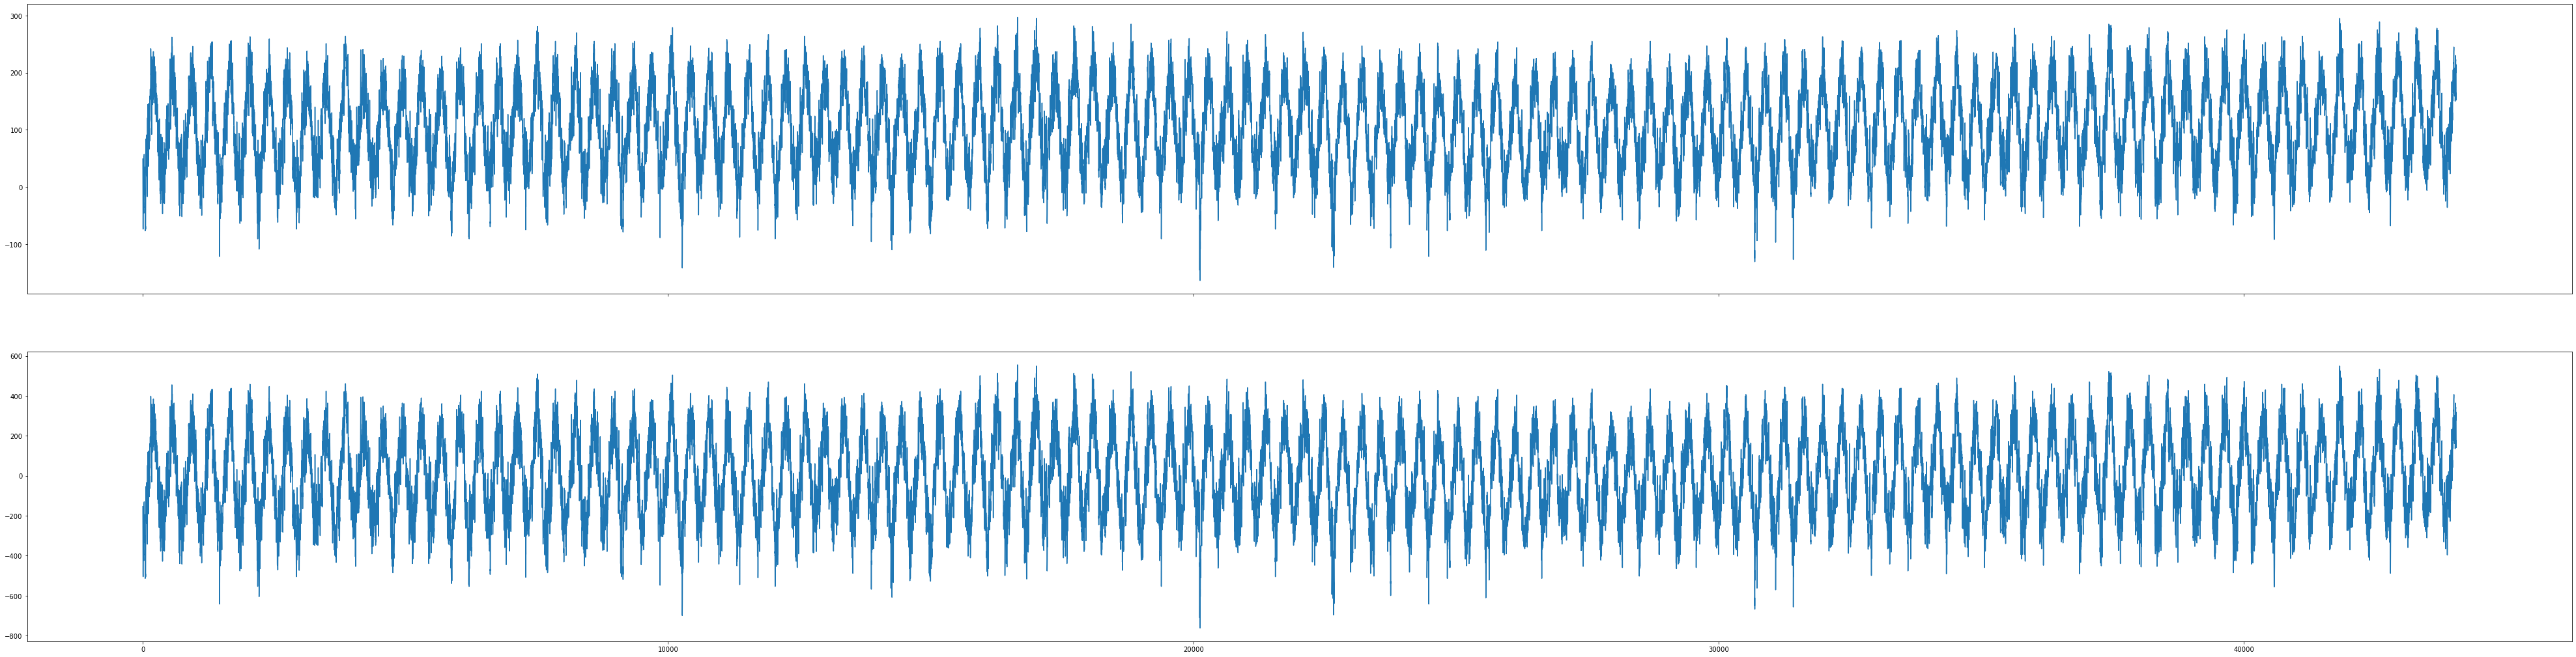

In [6]:
# Before working with the data let's normalize it
n = observatoire.index.size
normzed = (np.sqrt(n) / observatoire.TG.std()) * (observatoire.TG - observatoire.TG.mean())
fig, axes = plt.subplots(figsize = (70,18), nrows=2)
observatoire.TG.plot(kind = 'line', ax = axes[0])
normzed.plot(kind = 'line', ax = axes[1], sharex = True, sharey = True)

observatoire["TG_N"] = normzed


# Linear models
# Y = TG, x = day
# Y ~ b_0 + b_1 * sin(x) + b_2 * x

# lm1 = smf.ols('TG_N ~ PP', data=observatoire).fit()
# print(lm1.params)
# plt.plot(observatoire.TG.dropna().index, lm1.fittedvalues)
    
# print(lm1.summary())

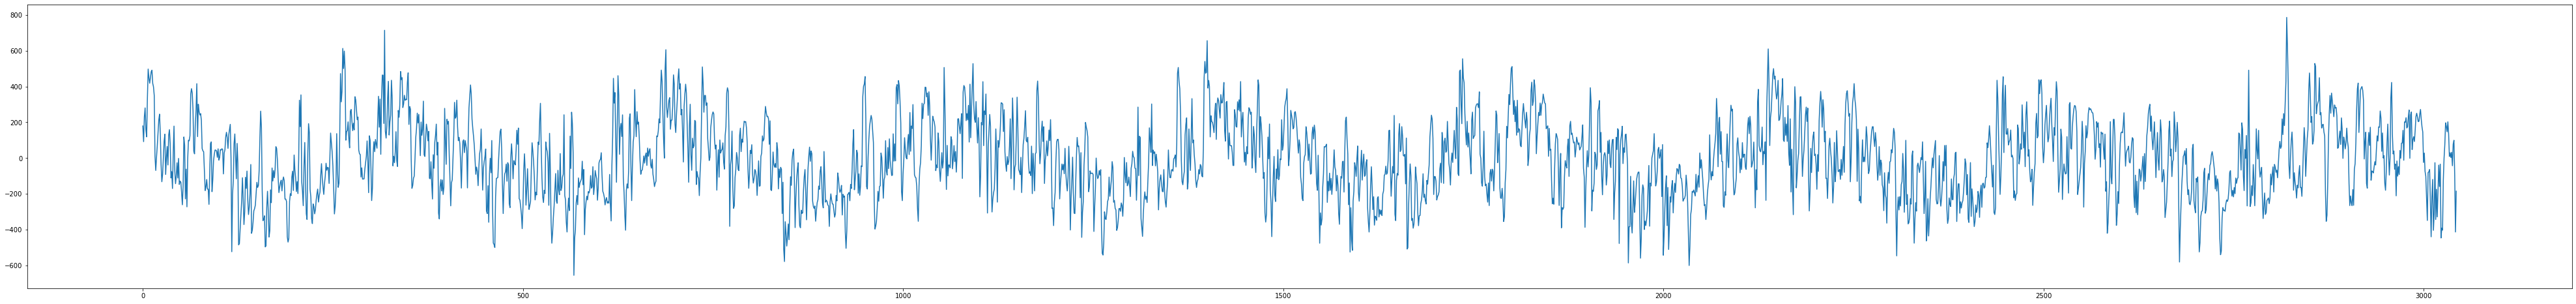

In [7]:

cons = observatoire["TX"]

cons.dropna(inplace=True)

detr = scipy.signal.detrend(cons)

len = cons.index.size
avg = cons.rolling(30 * 1).mean()
std = cons.rolling(30 * 1).std()
clt = math.sqrt(len) * (cons - avg) / std

clt = clt[41000:]

xx = clt - detr[41000:]


plt.figure(figsize = (70,8))
plt.plot(range(0, xx.shape[0]), xx)